In [1]:
import cv2
import numpy as np
from tensorflow import keras

In [2]:
# Collecting data and splitting data
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [3]:
# Lets visualise the train data before scaling
cv2.imwrite('test.jpg', x_train[0])
print(f'The target value is : {y_train[0]}')
from IPython.display import Image
Image('test.jpg')


The target value is : 5


In [4]:
# Data Scaling 
x_train = x_train.astype("float")/255
x_test = x_test.astype("float")/255

In [5]:
# expand dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000,)


In [6]:
# Lets visualise the train data after scaling
cv2.imwrite('test.jpg', x_train[0])
from IPython.display import Image
Image('test.jpg')

In [7]:
# Lets encode the target variable with one hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
# so lets check the one hot encoding 
np.argmax(y_train[0])

5

In [9]:
# Lets build the CNN 
model = keras.Sequential(
    [
     keras.Input((28,28,1)),
     keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
     keras.layers.MaxPool2D(pool_size=(2,2)),
     keras.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'),
     keras.layers.MaxPool2D(pool_size=(2,2)),
     keras.layers.Flatten(),
     keras.layers.Dropout(rate = 0.5),
     keras.layers.Dense(10, activation='softmax')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, use_multiprocessing=True)

Epoch 1/15
469/469 [==============================] - 9s 4ms/step - loss: 0.6934 - accuracy: 0.7832
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1243 - accuracy: 0.9623
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0868 - accuracy: 0.9727
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0719 - accuracy: 0.9775
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0651 - accuracy: 0.9803
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0570 - accuracy: 0.9830
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9845
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0465 - accuracy: 0.9865
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0436 - accuracy: 0.9868
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0405 - accuracy: 0.9873

In [12]:
acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0255 - accuracy: 0.9916


In [13]:
print(f'The loss is : {acc[0]}')
print(f'The accuracy is : {acc[1]}')

The loss is : 0.02547663077712059
The accuracy is : 0.991599977016449


The predicted value is : 5


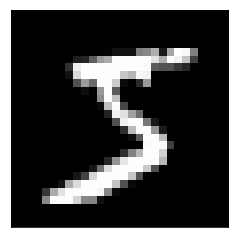

In [46]:
# Test in real world cases
image_path = "/content/drive/MyDrive/DATASETS/number_image/m.png"
test = cv2.imread(image_path,0 )
test = np.expand_dims(cv2.resize(test, (28,28)), -1)
test = test.reshape((1,28,28,1))
print(f'The predicted value is : {np.argmax(model.predict(test))}')
Image(image_path)

The predicted value is : 6


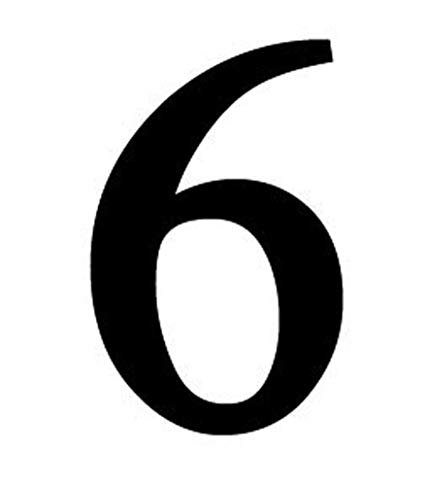

In [41]:
# Test in real world cases
image_path = "/content/drive/MyDrive/DATASETS/number_image/6.jpg"
test = cv2.imread(image_path,0 )
test = np.expand_dims(cv2.resize(test, (28,28)), -1)
test = test.reshape((1,28,28,1))
print(f'The predicted value is : {np.argmax(model.predict(test))}')
Image(image_path)

The predicted value is : 8


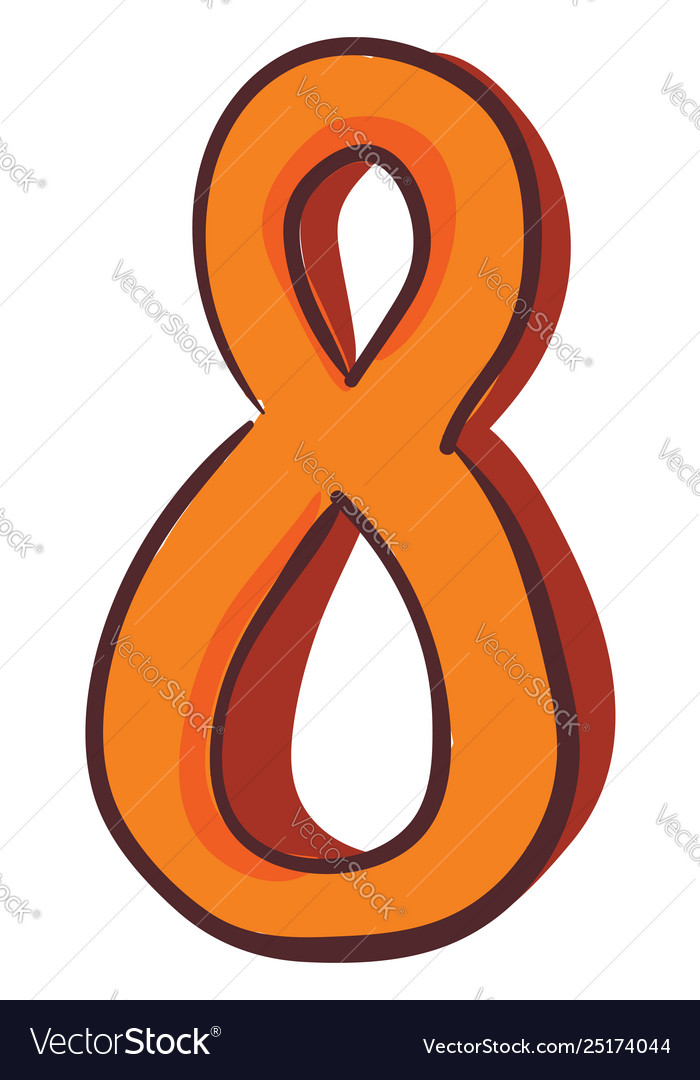

In [42]:
# Test in real world cases
image_path = "/content/drive/MyDrive/DATASETS/number_image/18_.jpg"
test = cv2.imread(image_path,0 )
test = np.expand_dims(cv2.resize(test, (28,28)), -1)
test = test.reshape((1,28,28,1))
print(f'The predicted value is : {np.argmax(model.predict(test))}')
Image(image_path)